Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Best SVM Model Parameters: {'C': 100, 'epsilon': 0.01, 'kernel': 'rbf'}
Train MAE: 5.178045613018843e-05, Test MAE: 8.89471234779785e-05
Train MSE: 9.211311325717044e-09, Test MSE: 3.5310455402506006e-08
Train RMSE: 0.0001, Test RMSE: 0.0002
Train RRMSE: 0.0182, Test RRMSE: 0.0616
Train R²: 0.9622, Test R²: 0.7414
Train AAPRE: 795.9366%, Test AAPRE: 707.3435%
Train RAE: 0.2168, Test RAE: 0.4460



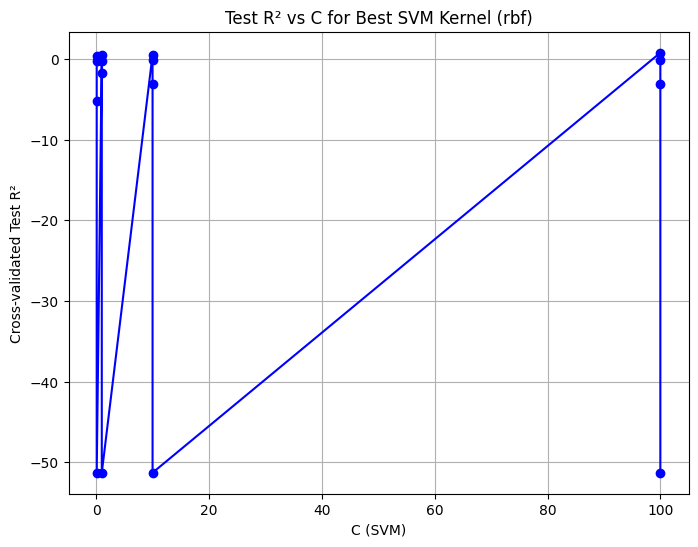

In [ ]:
# Import necessary libraries
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.svm import SVR

# Load data
df = pd.read_csv('/content/drive/My Drive/drugdata.csv')
df = df.iloc[:, :6].dropna()
X = df.iloc[:, :5]
y = df.iloc[:, 5]
d = 1000000

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler_X = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

# Function to calculate evaluation metrics including RAE
def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    rrmse = rmse / (np.max(y_true) - np.min(y_true))
    r2 = r2_score(y_true, y_pred)
    aapre = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    # RAE calculation
    rae = np.sum(np.abs(y_true - y_pred)) / np.sum(np.abs(y_true - np.mean(y_true)))

    return mae, mse, rmse, rrmse, r2, aapre, rae

# Define the SVM model
svm_model = SVR()

# Define hyperparameter grid for tuning
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.2, 0.5]
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train_scaled, validation_fraction=0.15)

# Best model after hyperparameter tuning
best_svm_model = grid_search.best_estimator_

# Make predictions
y_train_pred_scaled = best_svm_model.predict(X_train_scaled)
y_test_pred_scaled = best_svm_model.predict(X_test_scaled)

# Denormalize the predictions
y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).flatten()
y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()

# Calculate metrics for training and testing sets
train_mae, train_mse, train_rmse, train_rrmse, train_r2, train_aapre, train_rae = calculate_metrics(y_train / d, y_train_pred / d)
test_mae, test_mse, test_rmse, test_rrmse, test_r2, test_aapre, test_rae = calculate_metrics(y_test / d, y_test_pred / d)

# Print results
print(f"Best SVM Model Parameters: {grid_search.best_params_}")
print(f"Train MAE: {train_mae}, Test MAE: {test_mae}")
print(f"Train MSE: {train_mse}, Test MSE: {test_mse}")
print(f"Train RMSE: {train_rmse:.4f}, Test RMSE: {test_rmse:.4f}")
print(f"Train RRMSE: {train_rrmse:.4f}, Test RRMSE: {test_rrmse:.4f}")
print(f"Train R²: {train_r2:.4f}, Test R²: {test_r2:.4f}")
print(f"Train AAPRE: {train_aapre:.4f}%, Test AAPRE: {test_aapre:.4f}%")
print(f"Train RAE: {train_rae:.4f}, Test RAE: {test_rae:.4f}\n")

# Extract the mean test R² scores and corresponding parameters
mean_test_r2 = grid_search.cv_results_['mean_test_score']
params = grid_search.cv_results_['params']

# Filter out R² scores corresponding to the best kernel
best_kernel = grid_search.best_params_['kernel']
filtered_r2 = [mean_test_r2[i] for i in range(len(params)) if params[i]['kernel'] == best_kernel]
filtered_C = [params[i]['C'] for i in range(len(params)) if params[i]['kernel'] == best_kernel]

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(filtered_C, filtered_r2, marker='o', linestyle='-', color='b')
plt.xlabel('C (SVM)')
plt.ylabel('Cross-validated Test R²')
plt.title(f'Test R² vs C for Best SVM Kernel ({best_kernel})')
plt.grid(True)
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Processing Fold 1...
Processing Fold 2...
Processing Fold 3...
Processing Fold 4...
Fold 1
Train MAE: 5.126466588022298e-05, Test MAE: 8.660908016245885e-05
Train MSE: 8.578795491161512e-09, Test MSE: 3.0592768299582974e-08
Train RMSE: 0.0001, Test RMSE: 0.0002
Train RRMSE: 0.0175, Test RRMSE: 0.0574
Train R²: 0.9668, Test R²: 0.7295
Train AAPRE: 732.5292%, Test AAPRE: 758.9297%
Train RAE: 0.2061, Test RAE: 0.4885

Fold 2
Train MAE: 5.254438429678917e-05, Test MAE: 8.776597550850142e-05
Train MSE: 1.1684448376771443e-08, Test MSE: 2.5163172853072842e-08
Train RMSE: 0.0001, Test RMSE: 0.0002
Train RRMSE: 0.0205, Test RRMSE: 0.0442
Train R²: 0.9532, Test R²: 0.8188
Train AAPRE: 671.9529%, Test AAPRE: 1201.3148%
Train RAE: 0.2122, Test RAE: 0.4841

Fold 3
Train MAE: 4.562000723314109e-05, Test MAE: 9.386599605707254e-05
Train MSE: 9.390847740861308e-09, Test MSE

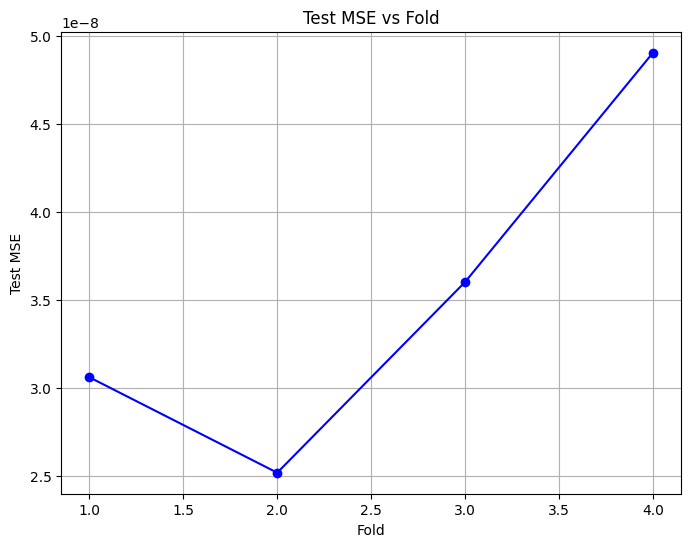

In [ ]:
# Import necessary libraries
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('/content/drive/My Drive/drugdata.csv')
df = df[:, :6].dropna()
X = df.iloc[:, :5]
y = df.iloc[:, 5]
d = 1000000

# Initialize KFold with 4 splits
kf = KFold(n_splits=4, shuffle=True, random_state=42)

# Store results for each fold
fold_results = []

# Function to calculate evaluation metrics including RAE
def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    rrmse = rmse / (np.max(y_true) - np.min(y_true))
    r2 = r2_score(y_true, y_pred)
    aapre = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    # RAE calculation
    rae = np.sum(np.abs(y_true - y_pred)) / np.sum(np.abs(y_true - np.mean(y_true)))

    return mae, mse, rmse, rrmse, r2, aapre, rae

for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    print(f"Processing Fold {fold}...")

    # Split the data for this fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Scale the data
    scaler_X = MinMaxScaler()
    X_train_scaled = scaler_X.fit_transform(X_train)
    X_test_scaled = scaler_X.transform(X_test)

    scaler_y = MinMaxScaler()
    y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
    y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

    # Define the SVR model
    model = SVR(C=100, epsilon=0.01, kernel='rbf')

    # Train the model
    model.fit(X_train_scaled, y_train_scaled)

    # Make predictions
    y_train_pred_scaled = model.predict(X_train_scaled)
    y_test_pred_scaled = model.predict(X_test_scaled)

    # Denormalize the predictions
    y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).flatten()
    y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()

    # Calculate metrics for training and testing sets
    train_mae, train_mse, train_rmse, train_rrmse, train_r2, train_aapre, train_rae = calculate_metrics(y_train/d, y_train_pred/d)
    test_mae, test_mse, test_rmse, test_rrmse, test_r2, test_aapre, test_rae = calculate_metrics(y_test/d, y_test_pred/d)

    # Save results for this fold
    fold_results.append({
        "fold": fold,
        "train_mae": train_mae, "train_mse": train_mse, "train_rmse": train_rmse, "train_rrmse": train_rrmse,
        "train_r2": train_r2, "train_aapre": train_aapre, "train_rae": train_rae,
        "test_mae": test_mae, "test_mse": test_mse, "test_rmse": test_rmse, "test_rrmse": test_rrmse,
        "test_r2": test_r2, "test_aapre": test_aapre, "test_rae": test_rae
    })

# Print results for each fold
for result in fold_results:
    print(f"Fold {result['fold']}")
    print(f"Train MAE: {result['train_mae']}, Test MAE: {result['test_mae']}")
    print(f"Train MSE: {result['train_mse']}, Test MSE: {result['test_mse']}")
    print(f"Train RMSE: {result['train_rmse']:.4f}, Test RMSE: {result['test_rmse']:.4f}")
    print(f"Train RRMSE: {result['train_rrmse']:.4f}, Test RRMSE: {result['test_rrmse']:.4f}")
    print(f"Train R²: {result['train_r2']:.4f}, Test R²: {result['test_r2']:.4f}")
    print(f"Train AAPRE: {result['train_aapre']:.4f}%, Test AAPRE: {result['test_aapre']:.4f}%")
    print(f"Train RAE: {result['train_rae']:.4f}, Test RAE: {result['test_rae']:.4f}\n")

# Plot the test MSE for each fold
test_mse_values = [result["test_mse"] for result in fold_results]
plt.figure(figsize=(8, 6))
plt.plot(range(1, 5), test_mse_values, marker='o', linestyle='-', color='b')
plt.xlabel('Fold')
plt.ylabel('Test MSE')
plt.title('Test MSE vs Fold')
plt.grid(True)
plt.show()
